# P2
## Lasse Vulto
## Notebook temperature


In [3]:
import os
import time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cf
from scipy import stats
from tqdm import trange

import helper_functions as hf


C:\Users\Lasse\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### a) Plots of mean fields

##### Read in NCEP data

In [4]:

T_NCEP_down = np.load('Analysis/T_NCEP_down.npy')
U_NCEP_down = np.load('Analysis/U_NCEP_down.npy')
V_NCEP_down = np.load('Analysis/V_NCEP_down.npy')


T_NCEP_test_down = np.load('Analysis/T_NCEP_test_down.npy')
U_NCEP_test_down = np.load('Analysis/U_NCEP_test_down.npy')
V_NCEP_test_down = np.load('Analysis/V_NCEP_test_down.npy')


U_NCEP_down_toxr, V_NCEP_down_toxr, T_NCEP_down_toxr = np.squeeze(U_NCEP_down), np.squeeze(V_NCEP_down), np.squeeze(T_NCEP_down)
U_NCEP_test_down_toxr, V_NCEP_test_down_toxr, T_NCEP_test_down_toxr = np.squeeze(U_NCEP_test_down), np.squeeze(V_NCEP_test_down), np.squeeze(T_NCEP_test_down)

NCEP_down = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_down_toxr),
        V = (['time', 'y', 'x'], V_NCEP_down_toxr),
        T = (['time', 'y', 'x'], T_NCEP_down_toxr))
)

NCEP_test_down = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_test_down_toxr),
        V = (['time', 'y', 'x'], V_NCEP_test_down_toxr),
        T = (['time', 'y', 'x'], T_NCEP_test_down_toxr))
)


##### Regrid the NCEP training data to 96 spatial coordinates, for computation of the RMSE later

In [5]:
U_NCEP_down_regrid = hf.regrid(U_NCEP_down, 6)
V_NCEP_down_regrid = hf.regrid(V_NCEP_down, 6)
T_NCEP_down_regrid = hf.regrid(T_NCEP_down, 6)



(2920, 32, 32)

In [6]:
NCEP_down_regrid = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_down_regrid),
        V = (['time', 'y', 'x'], V_NCEP_down_regrid),
        T = (['time', 'y', 'x'], T_NCEP_down_regrid))
)

U_NCEP_down_regrid.shape

(4128, 96, 96)

##### Read in WRP training data

In [7]:
T_WRF_3km = np.load('Analysis/T_WRF_3km.npy')
U_WRF_3km = np.load('Analysis/U_WRF_3km.npy')
V_WRF_3km = np.load('Analysis/V_WRF_3km.npy')

T_WRF_9km = np.load('Analysis/T_WRF_9km.npy')
U_WRF_9km = np.load('Analysis/U_WRF_9km.npy')
V_WRF_9km = np.load('Analysis/v_WRF_9km.npy')

T_WRF_3km_test = np.load('Analysis/T_WRF_3km_test.npy')
U_WRF_3km_test = np.load('Analysis/U_WRF_3km_test.npy')
V_WRF_3km_test = np.load('Analysis/V_WRF_3km_test.npy')

T_WRF_9km_test = np.load('Analysis/T_WRF_9km_test.npy')
U_WRF_9km_test = np.load('Analysis/U_WRF_9km_test.npy')
V_WRF_9km_test = np.load('Analysis/V_WRF_9km_test.npy')

# used in training
T_WRF_9km_down = hf.downscale_image(T_WRF_9km, 3)
U_WRF_9km_down = hf.downscale_image(U_WRF_9km, 3)
V_WRF_9km_down = hf.downscale_image(V_WRF_9km, 3)

# used in testing
T_WRF_9km_test_down = hf.downscale_image(T_WRF_9km_test, 3)
U_WRF_9km_test_down = hf.downscale_image(U_WRF_9km_test, 3)
V_WRF_9km_test_down = hf.downscale_image(V_WRF_9km_test, 3)

WRF_3km = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_3km),
        V = (['time', 'y', 'x'], V_WRF_3km),
        T = (['time', 'y', 'x'], T_WRF_3km))
)

WRF_9km = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_9km),
        V = (['time', 'y', 'x'], V_WRF_9km),
        T = (['time', 'y', 'x'], T_WRF_9km))
)

T_WRF_9km_test_down_toxr, U_WRF_9km_test_down_toxr, V_WRF_9km_test_down_toxr = np.squeeze(T_WRF_9km_test_down), np.squeeze(U_WRF_9km_test_down), np.squeeze(V_WRF_9km_test_down)

WRF_9km_test = xr.Dataset(
      data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_9km_test_down_toxr),
        V = (['time', 'y', 'x'], V_WRF_9km_test_down_toxr),
        T = (['time', 'y', 'x'], T_WRF_9km_test_down_toxr))  
)




In [500]:
c3 = xr.open_dataset('Coordinates_3km_part1.nc')
lat_WRF_3km_part1 = np.array(c3['XLAT'][0])[:,0:96]
lon_WRF_3km_part1 = np.array(c3['XLONG'][0])[:,0:96]




(96, 96)

(89, 93)

In [282]:
xarr_3km_U = xr.DataArray(WRF_3km.U.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_3km_V = xr.DataArray(WRF_3km.V.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_3km_T = xr.DataArray(WRF_3km.T.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])

xarr_9km_U = xr.DataArray(WRF_9km.U.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_9km_V = xr.DataArray(WRF_9km.V.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_9km_T = xr.DataArray(WRF_9km.T.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])

xarr_18km_U = xr.DataArray(NCEP_down_regrid.U.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_18km_V = xr.DataArray(NCEP_down_regrid.V.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])
xarr_18km_T = xr.DataArray(NCEP_down_regrid.T.mean('time'), coords=[('lat', lat_WRF_3km_part1[:,0]), ('lon',lon_WRF_3km_part1[0,:])])

In [283]:
X_arr_U = [xarr_3km_U, xarr_9km_U, xarr_18km_U]
X_arr_V = [xarr_3km_V, xarr_9km_V, xarr_18km_V]
X_arr_T = [xarr_3km_T, xarr_9km_T, xarr_18km_T]

In [381]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib as mpl

def plot(X_arr, cbar, title, vmin, vmax, label):
    fig, axs = plt.subplots(figsize=(10,20), ncols =1, nrows=3, subplot_kw={'projection': ccrs.PlateCarree(),"aspect": 1})

    for i,ax in enumerate(axs):
        if i == 0:
            ax.set_title('3km grid size')
        im = X_arr[i].plot(ax=ax, cmap=cbar, vmin=vmin, vmax=vmax, add_colorbar=False)
        ax.grid()
        gl = axs[i].gridlines(draw_labels=True)
        gl.xlabels_top=False
        gl.ylabels_right=False
        ax.add_feature(cf.BORDERS)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

#         ax.set_xticks(range(len(lon_WRF_3km_part1[0,:]))[::50])
#         ax.set_xticklabels(lon_WRF_3km_part1[0,:][::50])

    plt.suptitle(title)
#     fig.tight_layout()
    cax,kw = mpl.colorbar.make_axes([ax for ax in axs.flat])
    plt.colorbar(im, cax=cax, **kw, label=label)

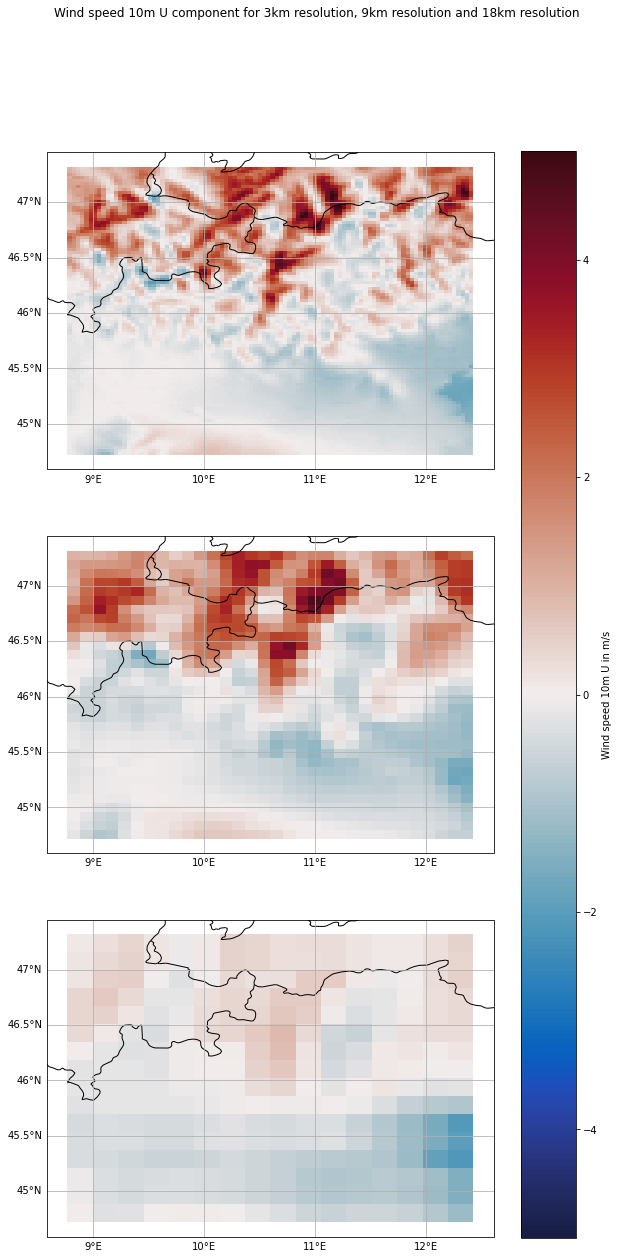

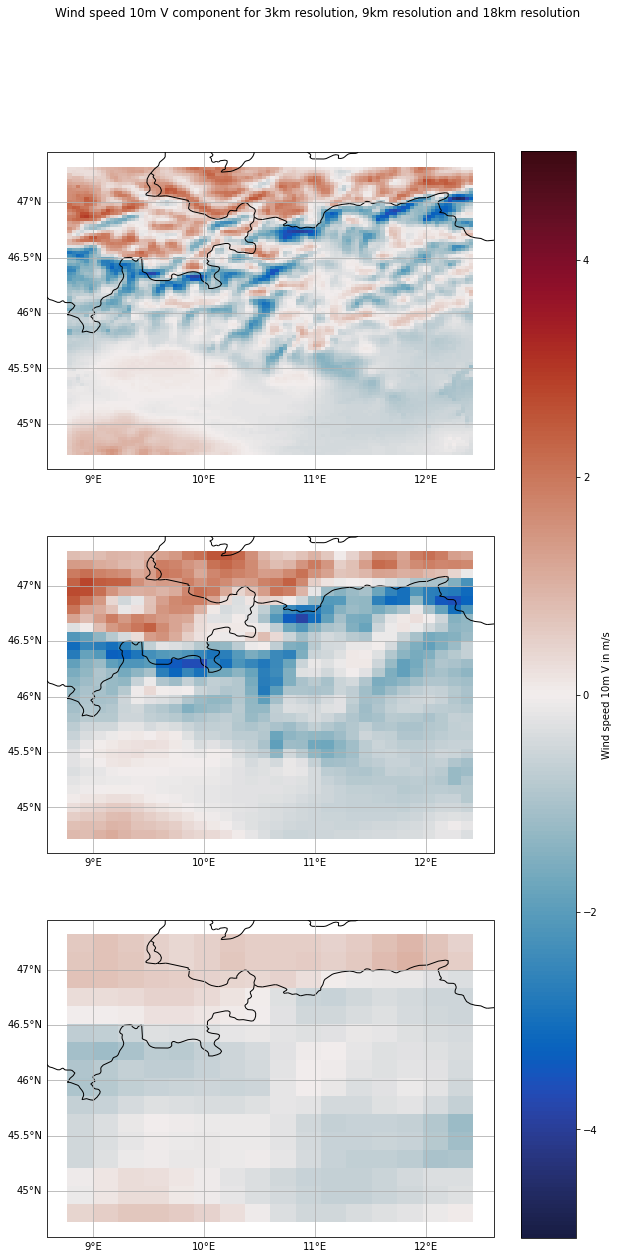

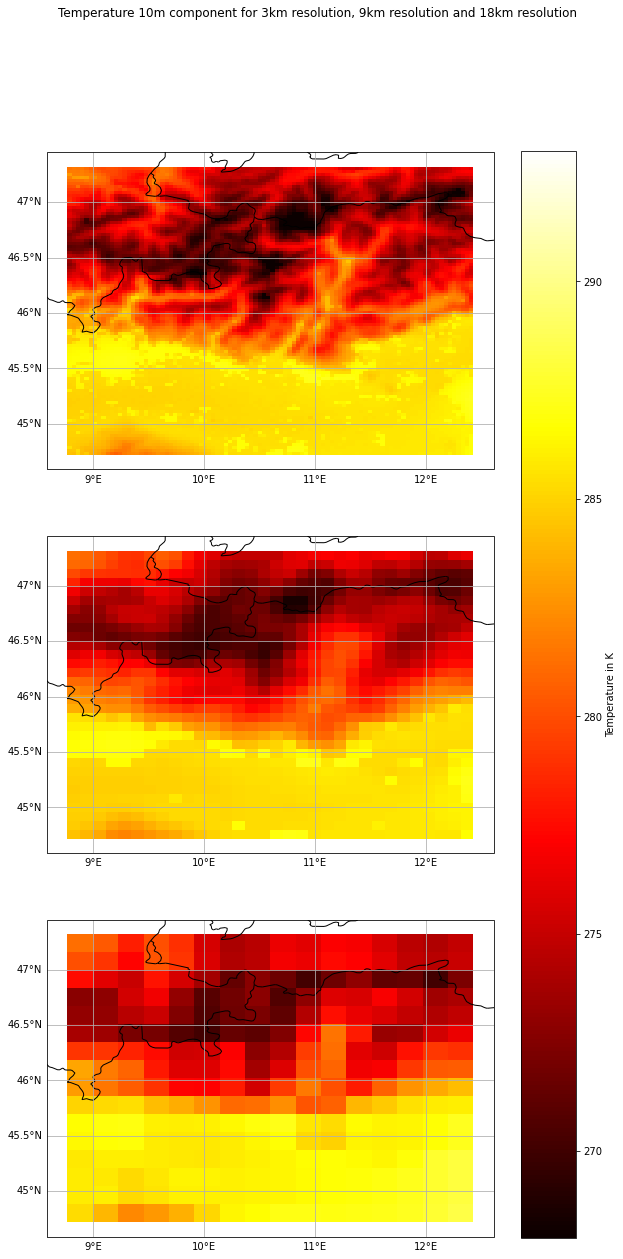

In [384]:
plot(X_arr_U, cm.cm.balance,'Wind speed 10m U component for 3km resolution, 9km resolution and 18km resolution',-5,5,'Wind speed 10m U in m/s' )
plot(X_arr_V, cm.cm.balance,'Wind speed 10m V component for 3km resolution, 9km resolution and 18km resolution',-5,5, "Wind speed 10m V in m/s")
plot(X_arr_T, 'hot', "Temperature 10m component for 3km resolution, 9km resolution and 18km resolution",268,293, "Temperature in K")


## Probability distribution function

In [355]:
NCEP_down_regrid.U.shape

(4128, 96, 96)

In [356]:
## From sklearns
from sklearn.metrics import mean_squared_error as mse

def compute_pdf(data1, data2):
    if not len(data1) == len(data2):
        print('sizes do not correspond!')
    
    
    # calculate the RMSE
    diff = data1 - data2
    square = diff**2
    sm = square.sum('x').sum('y')
    div = sm/(square.shape[1]*square.shape[2])
    rmse = div**(0.5)
#     rmse = mse(data1, data2)

    # calculate the PDF
    xs =  np.linspace(min(rmse)-1, max(rmse)+1, len(rmse))
    kde = stats.gaussian_kde(rmse)
    return xs, kde(xs)
    
U_pdf_NCEP_WRF3_x, U_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.U, WRF_3km.U)
V_pdf_NCEP_WRF3_x, V_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.V, WRF_3km.V)
T_pdf_NCEP_WRF3_x, T_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.T, WRF_3km.T)

U_pdf_NCEP_WRF9_x, U_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.U, WRF_9km.U)
V_pdf_NCEP_WRF9_x, V_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.V, WRF_9km.V)
T_pdf_NCEP_WRF9_x, T_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.T, WRF_9km.T)




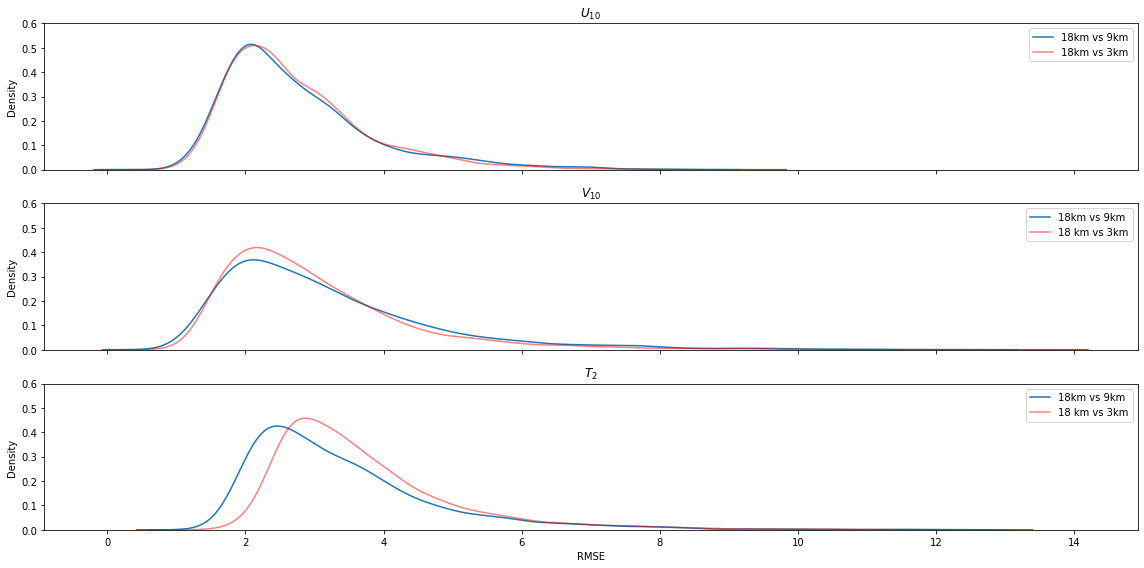

In [365]:
ymin, ymax = 0, 0.6

fig, axs = plt.subplots(nrows=3, figsize=(16,8), sharex=True)

axs[0].plot(U_pdf_NCEP_WRF9_x, U_pdf_NCEP_WRF9_kde, label='18km vs 9km', c=colors[0])
axs[0].plot(U_pdf_NCEP_WRF3_x, U_pdf_NCEP_WRF3_kde, label='18km vs 3km', c='r', alpha=0.5)
axs[0].legend()
axs[0].set_title('$U_{10m}$')
axs[0].set_ylim([ymin, ymax])
axs[0].set_ylabel('Density')

axs[1].plot(V_pdf_NCEP_WRF9_x, V_pdf_NCEP_WRF9_kde, label='18km vs 9km', c=colors[0])
axs[1].plot(V_pdf_NCEP_WRF3_x, V_pdf_NCEP_WRF3_kde, label='18 km vs 3km',c='r', alpha=0.5)
axs[1].legend()
axs[1].set_title('$V_{10m}$')
axs[1].set_ylim([ymin, ymax])
axs[1].set_ylabel('Density')

axs[2].plot(T_pdf_NCEP_WRF9_x, T_pdf_NCEP_WRF9_kde, label='18km vs 9km', c=colors[0])
axs[2].plot(T_pdf_NCEP_WRF3_x, T_pdf_NCEP_WRF3_kde, label='18 km vs 3km',c='r', alpha=0.5)
axs[2].legend()
axs[2].set_title('$T_{2m}$')
axs[2].set_xlabel('RMSE')
axs[2].set_ylim([ymin, ymax])
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.subtitle('')
# plt.savefig('Figures/b) PDFs')

## c) GAN predictions

#### Read in data

In [366]:
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch import Tensor
import torch.nn as nn
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F

data_slice = 1028

T_NCEP_train = np.reshape(T_NCEP_down, newshape=(4128,1,16,16))
T_WRF_9km_train = np.reshape(T_WRF_9km_down, newshape=(4128,1,32,32))

train_low_res_T = Tensor(T_NCEP_train[:data_slice]).float()
train_high_res_T = Tensor(T_WRF_9km_train[:data_slice]).float()


batch_size=128
dataloader = DataLoader(list(zip(train_low_res_T, train_high_res_T)), batch_size=batch_size, shuffle=True) 

In [58]:
device = torch.device('cuda')
device

device(type='cuda')

## GAN 

##### Generator

In [59]:
class Generator(nn.Module): #This generator works in principle, Francesco approves 
    def __init__(self):
        super(Generator, self).__init__()


        self.a = nn.LeakyReLU()
        self.conv1 = nn.ConvTranspose2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.a2 = nn.LeakyReLU()
        self.conv2 = nn.Conv2d(32,64, kernel_size = 3, stride=1, padding = 1)
        self.conv3 = nn.Conv2d(64,128, kernel_size = 3, stride=1, padding = 1)
        self.convout = nn.Conv2d(128,1, kernel_size = 3, stride=1, padding = 1)
        # self.a3 = nn.Tanh() # Lasse suggestion

        
    def forward(self, LR): 
        img = self.a(self.conv1(LR))
        img = self.conv2(img)
        img = self.a2(img)
        img = self.conv3(img)
        img = self.a2(img)
        img = self.convout(img)
        img = self.a2(img)
        # img = self.a3(img) #Lasse suggestoin 
        
        return img
    

In [60]:
class Discriminator(nn.Module): #This generator works in principle, Francesco approves 
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.conv6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.conv7 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.conv8 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.AdaptiveAvgPool2d((6 ,6)),
            nn.Flatten(),
            nn.Linear(in_features=(32*32*512), out_features=1024),
            nn.LeakyReLU(0.2),
            nn.Linear(in_features=1024,out_features=1)
        )
        
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d((2, 2)),  # Adjust the output size
            nn.Flatten(),
            nn.Linear(in_features=(512 * 2 * 2), out_features=1024),
            nn.LeakyReLU(0.2),
            nn.Linear(in_features=1024, out_features=1),
            nn.Sigmoid()
        )
        
        self.out = nn.Linear(in_features = 512, out_features = 1)
    def forward(self,x):
        x = self.conv1(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv2(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv3(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv4(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv5(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv6(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv7(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv8(x)
        
        x = self.fc(x)
        return x

#### Optimizer

In [393]:
# suggested default - beta parameters (decay of first order momentum of gradients)
b1 = 0.5
b2 = 0.999

# suggested default - learning rate
lr_g = 1e-3
lr_d = 1e-4

generator = Generator()
discriminator = Discriminator()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(b1,b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(b1,b2))

In [385]:
# from torchsummary import summary
# summary(generator, (1, 16, 16))

Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 32, 32, 32]          544
├─LeakyReLU: 1-2                         [-1, 32, 32, 32]          --
├─Conv2d: 1-3                            [-1, 64, 32, 32]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 32, 32]          --
├─Conv2d: 1-5                            [-1, 128, 32, 32]         73,856
├─LeakyReLU: 1-6                         [-1, 128, 32, 32]         --
├─Conv2d: 1-7                            [-1, 1, 32, 32]           1,153
├─LeakyReLU: 1-8                         [-1, 1, 32, 32]           --
Total params: 94,049
Trainable params: 94,049
Non-trainable params: 0
Total mult-adds (M): 96.08
Input size (MB): 0.00
Forward/backward pass size (MB): 1.76
Params size (MB): 0.36
Estimated Total Size (MB): 2.12


Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 32, 32, 32]          544
├─LeakyReLU: 1-2                         [-1, 32, 32, 32]          --
├─Conv2d: 1-3                            [-1, 64, 32, 32]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 32, 32]          --
├─Conv2d: 1-5                            [-1, 128, 32, 32]         73,856
├─LeakyReLU: 1-6                         [-1, 128, 32, 32]         --
├─Conv2d: 1-7                            [-1, 1, 32, 32]           1,153
├─LeakyReLU: 1-8                         [-1, 1, 32, 32]           --
Total params: 94,049
Trainable params: 94,049
Non-trainable params: 0
Total mult-adds (M): 96.08
Input size (MB): 0.00
Forward/backward pass size (MB): 1.76
Params size (MB): 0.36
Estimated Total Size (MB): 2.12

In [386]:
# from torchsummary import summary
# summary(discriminator, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 32, 32]          640
├─Sequential: 1-2                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 16, 16]          36,928
|    └─BatchNorm2d: 2-2                  [-1, 64, 16, 16]          128
|    └─LeakyReLU: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-3                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-5                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-6                    [-1, 128, 16, 16]         --
├─Sequential: 1-4                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-8                  [-1, 128, 8, 8]           256
|    └─LeakyReLU: 2-9                    [-1, 128, 8, 8]           -

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 32, 32]          640
├─Sequential: 1-2                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 16, 16]          36,928
|    └─BatchNorm2d: 2-2                  [-1, 64, 16, 16]          128
|    └─LeakyReLU: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-3                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-5                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-6                    [-1, 128, 16, 16]         --
├─Sequential: 1-4                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-8                  [-1, 128, 8, 8]           256
|    └─LeakyReLU: 2-9                    [-1, 128, 8, 8]           -

In [394]:
generator_loss = torch.nn.MSELoss()
discriminator_loss = torch.nn.BCELoss() # torch.nn.CrossEntropyLoss(reduction='none')

# adversarial_loss = torch.nn.MSELoss()
# loss_fct = torch.nn.CrossEntropyLoss(reduction='none')

### Train

In [432]:

from torch.autograd import Variable
import torch.nn.functional as F

n_epochs = 100
n_pretrain = 5 
crit_g = 1
alpha = 0.1

start_time = time.time() 

loss_per_epoch_generator = []
loss_per_epoch_discriminator = []
for epoch in range(n_epochs):
    epoch_time = time.time()
    
    loss_this_epoch_generator=[]
    loss_this_epoch_discriminator=[]

    ### PRETRAIN
    optimizer_G.zero_grad()
    if epoch < n_pretrain:
        print(f"Pretraining epoch {epoch}; time spent: {epoch_time - start_time:.2f} s")
        for i, (lowres, highres) in enumerate(dataloader):         

            highres_gen = generator(lowres)

            # i think this is the content loss?
            # pretrain_generator_loss = generator_loss(highres_gen, highres)
            g_loss = generator_loss(highres_gen, highres)

            loss_this_epoch_generator.append(g_loss.item())
            loss_this_epoch_discriminator.append(0)
            
            g_loss.backward()
            # pretrain_generator_loss.backward()# If didn't use detach() for gen_imgs, all weights of the generator will be calculated with backward(). 
            optimizer_G.step()
            
    ### TRAIN   
    if epoch>= n_pretrain:
        print(f"Training epoch {epoch}; time spent: {epoch_time - start_time:.2f} s")
        start_time = time.time()  

        for i, (lowres, highres_real) in enumerate(dataloader):

            time_i = time.time()
            if i%20 ==0:
                print(f'        Still running epoch {epoch}... i={i}/{len(dataloader)}')

            # make the tensors that will be compared in the adverserial losses
            valid_dis = Variable(Tensor(highres_real.size(0), 1).fill_(1.0), requires_grad=False) 
            fake_dis  = Variable(Tensor(highres_real.size(0), 1).fill_(0.0), requires_grad=False)    
            
            # generate the high resolution image
            highres_gen = generator(lowres)

            ### TRAIN DISCRIMINATOR
            optimizer_D.zero_grad()

            real_loss = discriminator_loss(discriminator(highres_real), valid_dis) 
            fake_loss = discriminator_loss(discriminator(highres_gen.detach()), fake_dis) 

            d_loss = (real_loss + fake_loss) / 2
            loss_this_epoch_discriminator.append(d_loss.item())

            d_loss.backward()
            optimizer_D.step()
            
            ### TRAIN GENERATOR 
            optimizer_G.zero_grad()

            # Loss measures generator's ability to fool the discriminator
            g_adverserial_loss = discriminator_loss(discriminator(highres_gen), valid_dis) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
            g_content_loss = generator_loss(highres_gen, highres_real)

            # alpha is a hyperparameter    
            g_loss = g_content_loss + (alpha * g_adverserial_loss)
            
            loss_this_epoch_generator.append(g_loss.item())
            
            # now backpropogate the total g_loss
            g_loss.backward(retain_graph=True)
            optimizer_G.step()    
            
            
            
            
            ### DYNAMICAL STEP; DO IT AGAIN IF DISCRIMINATOR LOSS IS TOO HIGH OR TOO LOW                 
            

            ### RETRAIN DISCRIMINATOR  
            dis_count = 0
            while d_loss.item() > 0.6 and (dis_count < 1):              
                highres_gen = generator(lowres)
                
                optimizer_D.zero_grad()

                real_loss = discriminator_loss(discriminator(highres_real), valid_dis) 
                fake_loss = discriminator_loss(discriminator(highres_gen.detach()), fake_dis) 

                d_loss = (real_loss + fake_loss) / 2
                loss_this_epoch_discriminator.append(d_loss.item())

                d_loss.backward()
                optimizer_D.step()

                dis_count += 1

            ### RETRAIN GENERATOR
            gen_count = 0
            while (d_loss.item() < 0.46) and (gen_count < 1):
                highres_gen = generator(lowres)
                
                optimizer_G.zero_grad()

                # Loss measures generator's ability to fool the discriminator
                g_adverserial_loss = discriminator_loss(discriminator(highres_gen), valid_dis) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
                g_content_loss = generator_loss(highres_gen, highres_real)

                # alpha is a hyperparameter    
                g_loss = g_content_loss + (alpha * g_adverserial_loss)

                loss_this_epoch_generator.append(g_loss.item())

                # now backpropogate the total g_loss
                g_loss.backward(retain_graph=True)
                optimizer_G.step()                

                gen_count += 1
                
    # compute the mean loss for this epoch
    mean_loss_discriminator = np.mean(loss_this_epoch_discriminator)
    mean_loss_generator = np.mean(loss_this_epoch_generator)
    
    loss_per_epoch_discriminator.append(mean_loss_discriminator)
    loss_per_epoch_generator.append(mean_loss_generator)
    
    

    
    print(f'        Discriminator loss: {mean_loss_discriminator:.4f}, Generator loss: {mean_loss_generator:.4f}')

            
#            
            

Pretraining epoch 0; time spent: 0.00 s
        Discriminator loss: 0.0000, Generator loss: 345.2381
Pretraining epoch 1; time spent: 4.26 s
        Discriminator loss: 0.0000, Generator loss: 5773.1301
Pretraining epoch 2; time spent: 8.57 s
        Discriminator loss: 0.0000, Generator loss: 16194.9626
Pretraining epoch 3; time spent: 13.08 s
        Discriminator loss: 0.0000, Generator loss: 27850.6097
Pretraining epoch 4; time spent: 17.46 s
        Discriminator loss: 0.0000, Generator loss: 43586.9868
Training epoch 5; time spent: 21.53 s
        Still running epoch 5... i=0/9
        Discriminator loss: 1.0453, Generator loss: 17833.9457
Training epoch 6; time spent: 25.46 s
        Still running epoch 6... i=0/9
        Discriminator loss: 0.0983, Generator loss: 437.6960
Training epoch 7; time spent: 25.10 s
        Still running epoch 7... i=0/9
        Discriminator loss: 0.0133, Generator loss: 111.0176
Training epoch 8; time spent: 27.12 s
        Still running epoch 8...

        Discriminator loss: 0.0013, Generator loss: 14.6902
Training epoch 61; time spent: 31.51 s
        Still running epoch 61... i=0/9
        Discriminator loss: 0.0011, Generator loss: 14.5873
Training epoch 62; time spent: 31.33 s
        Still running epoch 62... i=0/9
        Discriminator loss: 0.0010, Generator loss: 15.0513
Training epoch 63; time spent: 31.46 s
        Still running epoch 63... i=0/9
        Discriminator loss: 0.0008, Generator loss: 14.2561
Training epoch 64; time spent: 33.56 s
        Still running epoch 64... i=0/9
        Discriminator loss: 0.0008, Generator loss: 14.4960
Training epoch 65; time spent: 33.75 s
        Still running epoch 65... i=0/9
        Discriminator loss: 0.0007, Generator loss: 14.1141
Training epoch 66; time spent: 33.27 s
        Still running epoch 66... i=0/9
        Discriminator loss: 0.0006, Generator loss: 14.2285
Training epoch 67; time spent: 33.34 s
        Still running epoch 67... i=0/9
        Discriminator loss:

In [459]:
lowr = np.squeeze(lowres.detach()[i,:,:])
highr = np.squeeze(highres.detach()[i,:,:])

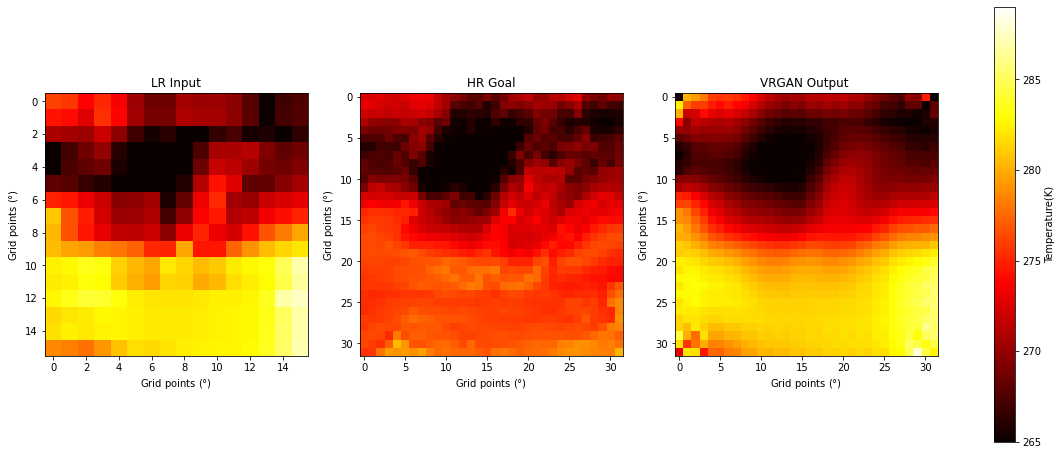

In [461]:
cmap = mpl.colormaps['hot']
vmin, vmax = 265, 289
i = 3

fig, axs = plt.subplots(figsize=(20,8), ncols=3, nrows=1)
im1 = axs[2].imshow(np.flipud(np.squeeze(generator(lowres).detach()[i,:,:])), vmin=vmin, vmax=vmax, cmap = cmap)
axs[2].set_title('VRGAN Output ')

im2 = axs[0].imshow(np.flipud(np.squeeze(lowres.detach()[i,:,:])), vmin=vmin, vmax=vmax, cmap = cmap)
axs[0].set_title('LR Input')

im3 = axs[1].imshow(np.flipud(np.squeeze(highres.detach()[i,:,:])), vmin=vmin, vmax=vmax, cmap=cmap)
axs[1].set_title('HR Goal')

cax,kw = mpl.colorbar.make_axes([ax for ax in axs.flat])
plt.colorbar(im3, cax=cax, **kw, label='Temperature(K)')

for i,ax in enumerate(axs):
    ax.set_ylabel('Grid points $(\degree)$')
    ax.set_xlabel('Grid points $(\degree)$')
   


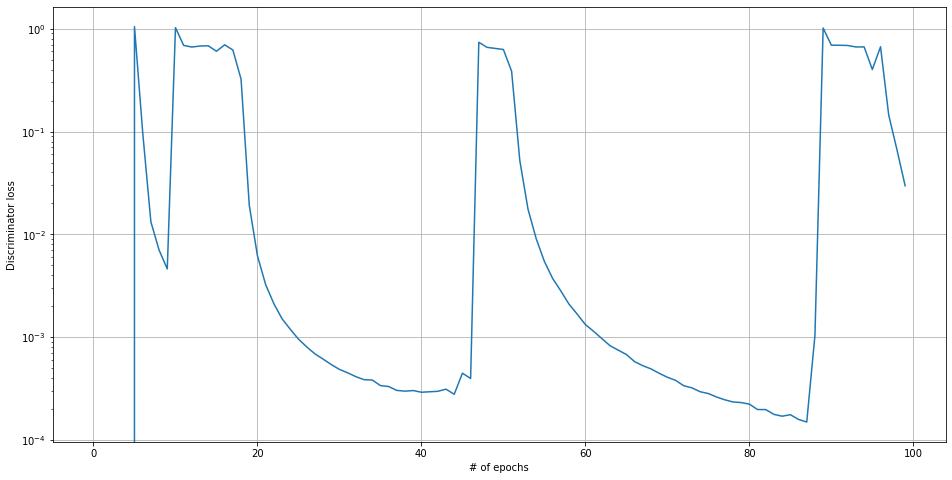

In [462]:
plt.figure(figsize=(16,8))
plt.plot(loss_per_epoch_discriminator)
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('Discriminator loss')
# plt.plot(loss_per_epoch_generator)
plt.yscale('log')

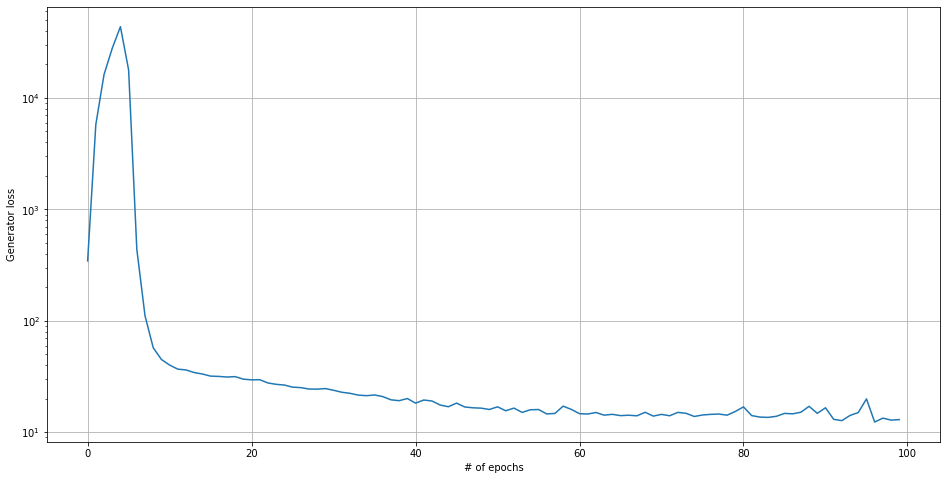

In [463]:
plt.figure(figsize=(16,8))
plt.plot(loss_per_epoch_generator)
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('Generator loss')
# plt.plot(loss_per_epoch_generator)
plt.yscale('log')

# d


In [471]:
T_NCEP_test_down.shape

(2920, 16, 16, 1)

In [437]:
T_NCEP_test = np.reshape(T_NCEP_test_down, newshape=(2920,1,16,16))

test_lr = Tensor(T_NCEP_test).float()
test_hr = generator(test_lr)

In [438]:
test_hr_numpy = np.squeeze(test_hr.detach().numpy())
test_hr_regrid = hf.regrid(test_hr_numpy, 3)

test_hr_numpy.shape, test_hr_regrid.shape

((2920, 32, 32), (2920, 96, 96))

In [554]:
test_hr_numpy.shape

(2920, 32, 32)

In [517]:
T_test_hf = hf.regrid(T_NCEP_test_down, 2)
T_test_NCEP9, T_pdf_NCEP9 = compute_pdf(T_test_hf,WRF_9km_test.T)

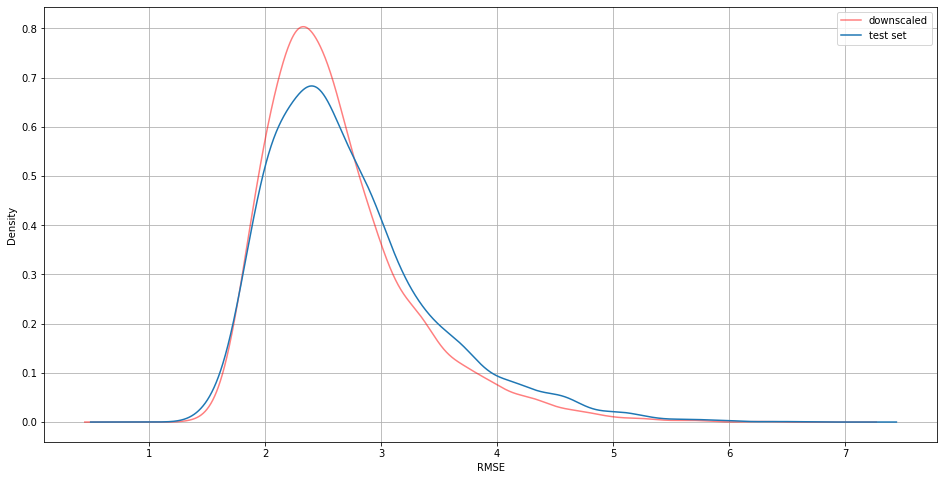

In [525]:
T_hr_test_x, T_hr_test_kde = compute_pdf(test_hr_numpy, WRF_9km_test.T)

plt.figure(figsize=(16,8))
plt.plot(T_hr_test_x, T_hr_test_kde, label='downscaled', c='r', alpha=0.5)
# plt.plot(T_pdf_NCEP_WRF9_x, T_pdf_NCEP_WRF9_kde, label='9km vs 18km, ', c=colors[0], ls='--')
plt.plot(T_test_NCEP9, T_pdf_NCEP9, label='test set', c=colors[0])
plt.ylabel('Density')
plt.xlabel('RMSE')
plt.grid()
plt.legend()


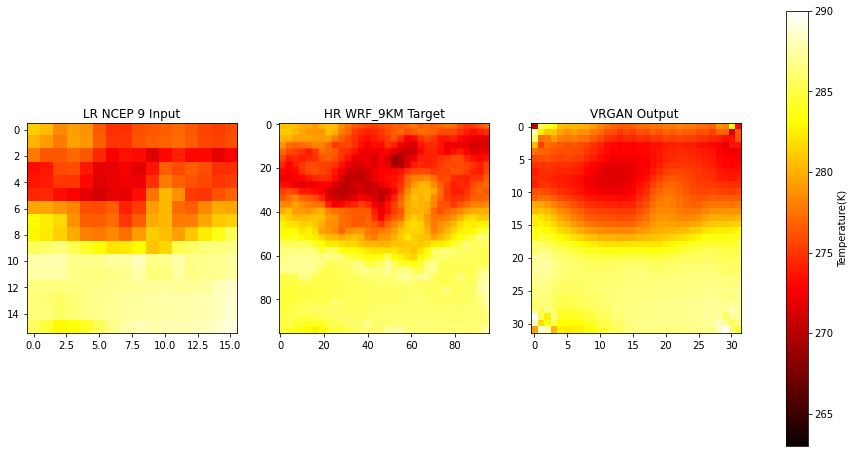

In [529]:
fig, axs = plt.subplots(figsize=(16,8), nrows=1, ncols=3)
vmin, vmax = 263, 290
cmap = mpl.colormaps['hot']

axs[0].imshow(np.flipud(np.mean(T_NCEP_test, axis=(0,1))),cmap=cmap,vmin=vmin,vmax=vmax)

im=axs[2].imshow(np.flipud(np.mean(test_hr.detach().numpy(), axis=(0,1))), cmap=cmap,vmin=vmin,vmax=vmax)
axs[1].imshow(np.flipud(np.mean(T_WRF_9km_test, axis=0)), cmap=cmap,vmin=vmin,vmax=vmax)
axs[2].set_title('VRGAN Output ')
axs[0].set_title('LR NCEP 9 Input')
axs[1].set_title('HR WRF_9KM Target')

cax,kw = mpl.colorbar.make_axes([ax for ax in axs.flat])
plt.colorbar(im, cax=cax, **kw, label='Temperature(K)')




In [473]:
T_WRF_9km_test.shape

(2920, 96, 96)

# RMSE map

In [540]:
rsquare_error = np.empty((2920,96,96))

for i in range(len(test_hr_regrid)):
    rsquare_error[i,:,:] = np.sqrt((T_WRF_9km_test[i] - test_hr_regrid[i])**2)
mse_lr = np.mean(rsquare_error, axis = 0)

Text(0.5, 1.0, 'RMSE per pixel')

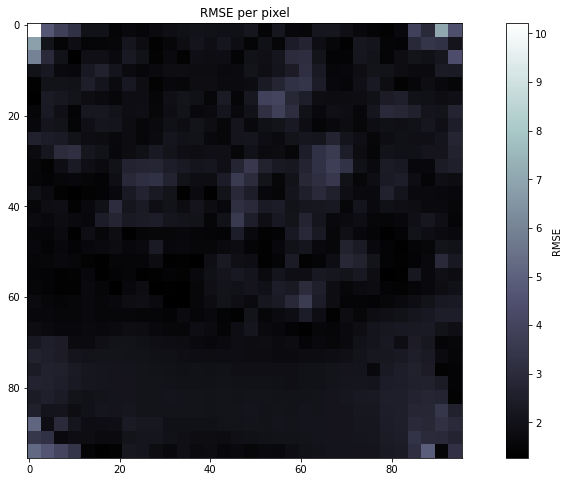

In [550]:
plt.figure(figsize=(16,8))
plt.imshow(np.flipud(mse_lr), cmap='bone')
plt.colorbar(label='RMSE')
plt.title('RMSE per pixel')
